Solution of Logistic Regression: [ 1.55275146 -4.09263293]
Final loss: 0.40240014111178296


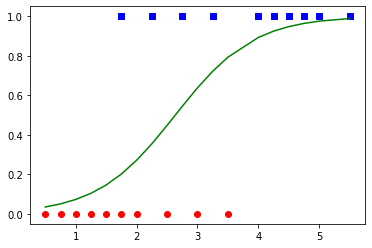

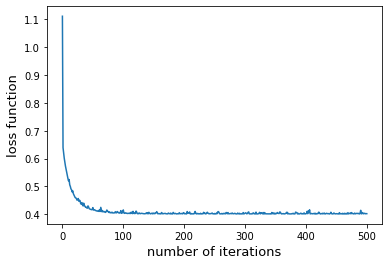

In [71]:
from __future__ import print_function
import numpy as np 


def sigmoid(S):
    """
    Hàm tính sigmoid
    """
    return 1/(1 + np.exp(-S))


def prob(w, X):
    """
    Hàm tính xác xuất cho mỗi điểm dữ liệu
    """
    return sigmoid(X.dot(w))


def loss(w, X, y):
    """
    Hàm mất mát theo công thức hồi quy logistic
    """
    z = prob(w, X)
    return -np.mean(y*np.log(z) + (1-y)*np.log(1-z))


def predict(w, X, threshold = 0.5):
    """
    Dự đoán output của mỗi hàng của X
    threshold: ngưỡng có giá trị từ 0 đến 1
    """
    res = np.zeros(X.shape[0])
    res[np.where(prob(w, X) > threshold)[0]] = 1
    return res 


def logistic_regression(w_init, X, y, lr = 0.1, nepoches = 2000):
    # lr - tốc độ học, nepoches - số lượng epoche
    N, d = X.shape[0], X.shape[1]
    w = w_old = w_init 
    # history của hàm loss
    loss_hist = [loss(w_init, X, y)]
    ep = 0 
    while ep < nepoches: 
        ep += 1
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i]
            yi = y[i]
            zi = sigmoid(xi.dot(w))
            w = w - lr*((zi - yi)*xi)
        loss_hist.append(loss(w, X, y))
        if np.linalg.norm(w - w_old)/d < 1e-6:
            break 
        w_old = w
    return w, loss_hist 

np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# thêm cột 1 vào X
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
lam = 0.0001
w, loss_hist = logistic_regression(w_init, Xbar, y, lr = 0.05, nepoches = 500)
print('Solution of Logistic Regression:', w)
print('Final loss:', loss(w, Xbar, y))

# Visualize
X0 = X[np.where(y == 0)]
y0 = y[np.where(y == 0)]
X1 = X[np.where(y == 1)]
y1 = y[np.where(y == 1)]
plt.plot(X0, y0, 'ro')
plt.plot(X1, y1, 'bs')
plt.plot(X, prob(w, Xbar), 'g-')
plt.show()

plt.plot(loss_hist)
plt.xlabel('number of iterations', fontsize = 13)
plt.ylabel('loss function', fontsize = 13)
plt.show()